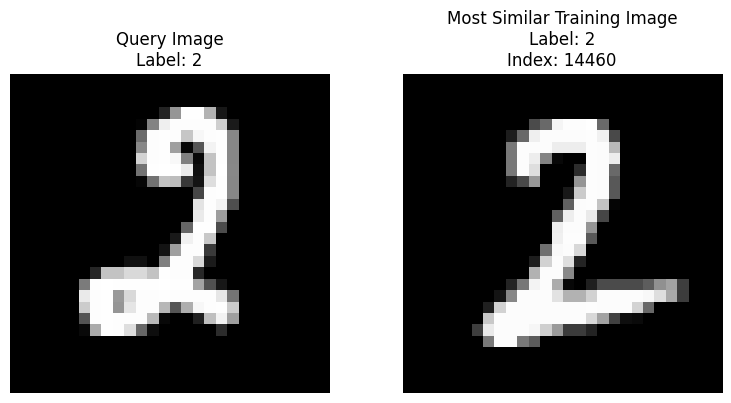

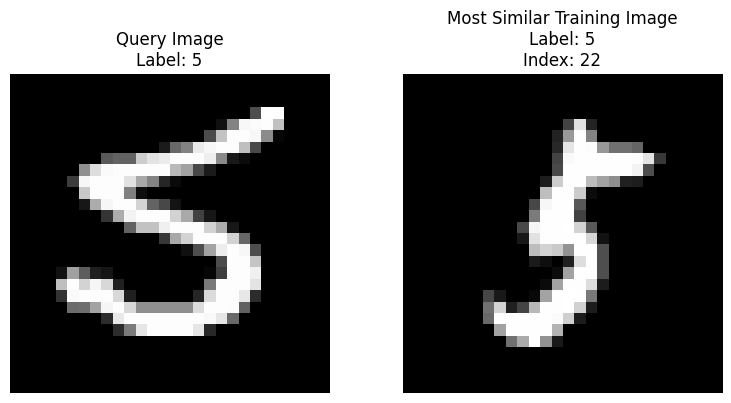

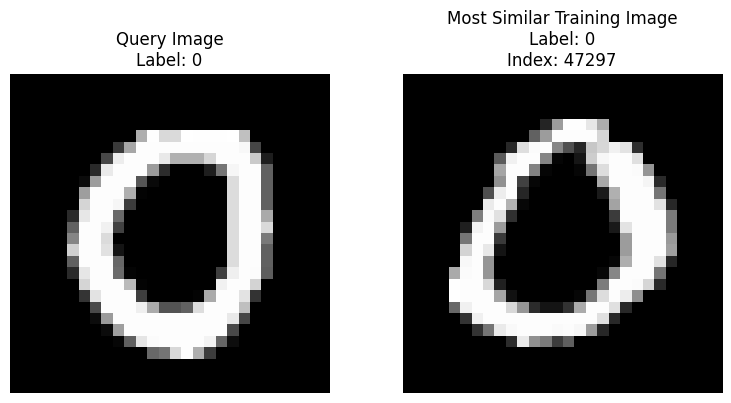

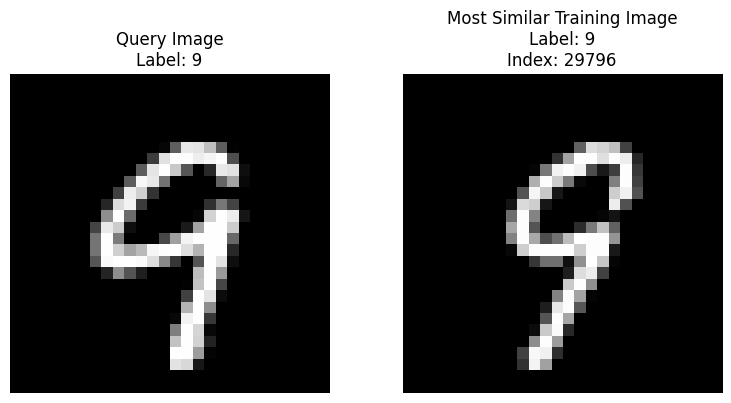

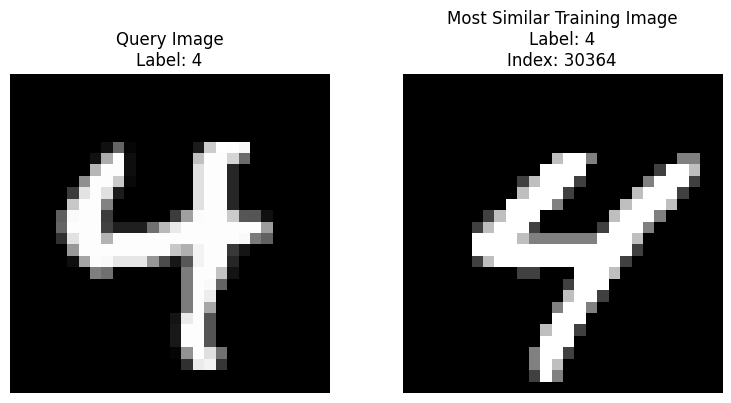

In [1]:
import torch
from model import CNNTrainingIndexer
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNTrainingIndexer(device)

test_dataset = datasets.MNIST(root='./data', train=False, transform=model.transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

test_images = []
for i, (image, label) in enumerate(test_loader):
    if i >= 5:  # 
        break
    test_images.append((image.squeeze(0), label.item()))  

for i in range(5):
    test_image, test_label = test_images[i]
    
    if isinstance(test_image, torch.Tensor):
        test_image_np = test_image.squeeze().numpy()  
    else:
        test_image_np = test_image

    similar_index = model.find_most_similar_index(test_image)

    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(test_image_np, cmap='gray')
    plt.title(f"Query Image\nLabel: {test_label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(model.train_images[similar_index], cmap='gray')
    plt.title(f"Most Similar Training Image\nLabel: {model.train_labels[similar_index]}\nIndex: {similar_index}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
